In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import scipy


In [6]:
# read in 3_240 csv

ciber = pd.read_csv('/global/scratch/users/empchase/Ciber2_i/paired/ExperimentData_20240423/data_3_240_1_50p.csv',usecols=['index_x', 'BCs', 'index_y', 'Tile-AD','Ratio'])


#just get tiles, maybe collapse for tile activity
ciber[['Tile', 'AD']] = ciber['index_y'].str.split('-', expand=True)
ciber

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD
0,TGGGCCGGAATTGC,2917,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,332,8.786145,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,ATATACCGCAC
1,GCTTCTCCGCACAT,2419,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,236,10.250000,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,TAACATCTATC
2,GTCCAGTTTAGTGA,2384,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,307,7.765472,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,AGTGCAGAGAC
3,TTAAATCATGAGTT,1920,TTGCCAGATTTGTTTGACTTCTCTACTGATCAATTTGGTGCTGACT...,333,5.765766,TTGCCAGATTTGTTTGACTTCTCTACTGATCAATTTGGTGCTGACT...,ATAATGGCCGA
4,TAGGAATTAGATCT,1899,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,151,12.576159,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,TTACTGCTGTG
...,...,...,...,...,...,...,...
2786,AGGAGCAAATTTGC,1,CATGGTTTGCCATCTGTTCCAAGAACTGCTAATGCTAATATGAATA...,1,1.000000,CATGGTTTGCCATCTGTTCCAAGAACTGCTAATGCTAATATGAATA...,GGAATGGGAGG
2787,TTATCACTTAAACA,1,AGAACTTCTTCTTTGCACTTTGATCCATCTTCTGATGTCTTGATTG...,20,0.050000,AGAACTTCTTCTTTGCACTTTGATCCATCTTCTGATGTCTTGATTG...,TCTCGTGACTT
2788,GCCCCCGTAACCTT,1,GCTAGGAAGATGCAAAGAATGGATCAATTGGAATTGAAATGTCAAT...,1,1.000000,GCTAGGAAGATGCAAAGAATGGATCAATTGGAATTGAAATGTCAAT...,CCCTTACCGAG
2789,CACAGTGTTACACG,1,TTGTCTTCTGTTTATCAAACTTCTTCTCCATTGTTGAGATTGGAAT...,13,0.076923,TTGTCTTCTGTTTATCAAACTTCTTCTCCATTGTTGAGATTGGAAT...,ATCCTGTGCTG


In [3]:
# read in BYS4 data csv
facs = pd.read_csv('/global/scratch/projects/fc_mvslab/data/sequencing/bys4/BYS4_reseq_2023/data/results/activities_gcn4_deep.csv')
facs = facs.fillna(0)
facs

,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B
0,ATGTTTGAATCTCCAGAATCTGAAGATCCAAATAATTGGGTTTCTT...,151955.968121,162815.675433,69103.0,6064.0
1,CAACCATTGCCAGAATTGGTTCAACCAGTTCAACCAACTGTTCAAC...,15672.305975,13939.841534,41004.0,15586.0
2,AGAAGATCTTCTAATCAACATACTGGTTCTGCTTCTGTTTCTCCAT...,27223.152223,25011.743931,82603.0,6671.0
3,CAACCAAGATTGAGAGATTCTAGAACTCCAGTCTTGCCATCTGCTA...,30476.900053,27222.937684,52824.0,39802.0
4,AGACCAGCTCAATTGCCACAACCAAGAAGAGTTTCTGAAATTGTTC...,17560.312993,10785.582193,45144.0,18.0
...,...,...,...,...,...
19091,TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGCTACTG...,0.000000,262143.000000,0.0,390.0
19092,TTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTG...,0.000000,262143.000000,0.0,281.0
19093,ACTGGTAATGTTCCACAAACTCCAAATATGGCTATGCAAGGTAAAT...,0.000000,262143.000000,0.0,13.0
19094,CCAATGATTAATACTGAAATGGATTTGAATGCTGCTCCAGAAGAAT...,0.000000,262143.000000,0.0,34.0


In [4]:
# get a weighted average of activity score

facs['weighted_av'] = ((facs['Activity_A']*facs['reads_A'])+(facs['Activity_B']*facs['reads_B']))/(facs['reads_A']+facs['reads_B'])
facs

,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
0,ATGTTTGAATCTCCAGAATCTGAAGATCCAAATAATTGGGTTTCTT...,151955.968121,162815.675433,69103.0,6064.0,152832.060890
1,CAACCATTGCCAGAATTGGTTCAACCAGTTCAACCAACTGTTCAAC...,15672.305975,13939.841534,41004.0,15586.0,15195.151164
2,AGAAGATCTTCTAATCAACATACTGGTTCTGCTTCTGTTTCTCCAT...,27223.152223,25011.743931,82603.0,6671.0,27057.904729
3,CAACCAAGATTGAGAGATTCTAGAACTCCAGTCTTGCCATCTGCTA...,30476.900053,27222.937684,52824.0,39802.0,29078.651071
4,AGACCAGCTCAATTGCCACAACCAAGAAGAGTTTCTGAAATTGTTC...,17560.312993,10785.582193,45144.0,18.0,17557.612821
...,...,...,...,...,...,...
19091,TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGCTACTG...,0.000000,262143.000000,0.0,390.0,262143.000000
19092,TTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTG...,0.000000,262143.000000,0.0,281.0,262143.000000
19093,ACTGGTAATGTTCCACAAACTCCAAATATGGCTATGCAAGGTAAAT...,0.000000,262143.000000,0.0,13.0,262143.000000
19094,CCAATGATTAATACTGAAATGGATTTGAATGCTGCTCCAGAAGAAT...,0.000000,262143.000000,0.0,34.0,262143.000000


<Axes: xlabel='weighted_av', ylabel='Count'>

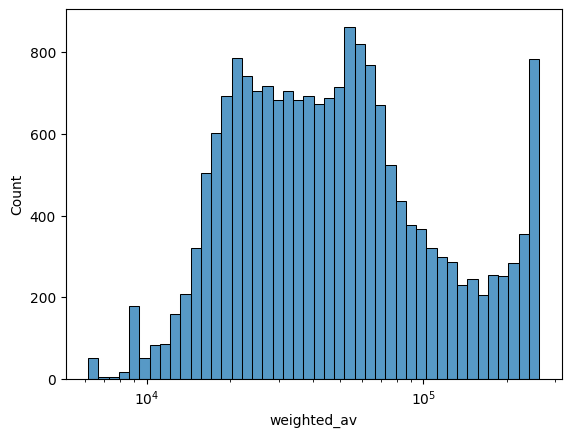

In [7]:
sns.histplot(data=facs, x='weighted_av', log_scale=True)

In [8]:
facs.describe()

,Activity_A,Activity_B,reads_A,reads_B,weighted_av
count,19096.000000,19096.000000,1.909600e+04,19096.000000,19096.000000
mean,59598.949318,48923.099577,2.320812e+04,16015.222874,67481.617282
std,64836.964379,60999.344913,1.190327e+05,31886.285524,63033.339016
min,0.000000,0.000000,0.000000e+00,0.000000,6138.000000
25%,18104.653232,12109.378526,6.307500e+02,158.750000,24857.039810
50%,38829.589382,26712.533318,7.911500e+03,5414.500000,44809.274042
75%,74885.464355,59433.373743,2.274300e+04,19267.250000,78450.681376
max,262143.000000,262143.000000,9.039530e+06,920728.000000,262143.000000


In [5]:
intersection = pd.merge(ciber, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
0,TGGGCCGGAATTGC,2917,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,332,8.786145,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,ATATACCGCAC,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,252783.250469,205088.018248,12034.0,18.0,252712.016303
1,GCTTCTCCGCACAT,2419,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,236,10.250000,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,TAACATCTATC,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,252390.696777,258607.941783,2722.0,11678.0,257432.709775
2,GTCCAGTTTAGTGA,2384,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,307,7.765472,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,AGTGCAGAGAC,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,252586.126418,222624.487250,17475.0,30141.0,233620.363520
3,TTAAATCATGAGTT,1920,TTGCCAGATTTGTTTGACTTCTCTACTGATCAATTTGGTGCTGACT...,333,5.765766,TTGCCAGATTTGTTTGACTTCTCTACTGATCAATTTGGTGCTGACT...,ATAATGGCCGA,TTGCCAGATTTGTTTGACTTCTCTACTGATCAATTTGGTGCTGACT...,70709.885080,250105.846429,32.0,113779.0,250055.406043
4,TAGGAATTAGATCT,1899,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,151,12.576159,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,TTACTGCTGTG,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,261683.287481,255592.816124,117627.0,45051.0,259996.631479
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,TGGCTATATAAGAT,1,ACTGTTGCTATGAAGAGAGCTAGAAATACTTTGGCTGCTAGGAAAT...,3,0.333333,ACTGTTGCTATGAAGAGAGCTAGAAATACTTTGGCTGCTAGGAAAT...,ATGATGTGTCC,ACTGTTGCTATGAAGAGAGCTAGAAATACTTTGGCTGCTAGGAAAT...,20186.794098,18903.078479,4808.0,34935.0,19058.378902
2610,AGGAGCAAATTTGC,1,CATGGTTTGCCATCTGTTCCAAGAACTGCTAATGCTAATATGAATA...,1,1.000000,CATGGTTTGCCATCTGTTCCAAGAACTGCTAATGCTAATATGAATA...,GGAATGGGAGG,CATGGTTTGCCATCTGTTCCAAGAACTGCTAATGCTAATATGAATA...,36570.237476,32194.702281,2756.0,17700.0,32784.210250
2611,GCCCCCGTAACCTT,1,GCTAGGAAGATGCAAAGAATGGATCAATTGGAATTGAAATGTCAAT...,1,1.000000,GCTAGGAAGATGCAAAGAATGGATCAATTGGAATTGAAATGTCAAT...,CCCTTACCGAG,GCTAGGAAGATGCAAAGAATGGATCAATTGGAATTGAAATGTCAAT...,0.000000,13125.770448,0.0,7251.0,13125.770448
2612,CACAGTGTTACACG,1,TTGTCTTCTGTTTATCAAACTTCTTCTCCATTGTTGAGATTGGAAT...,13,0.076923,TTGTCTTCTGTTTATCAAACTTCTTCTCCATTGTTGAGATTGGAAT...,ATCCTGTGCTG,TTGTCTTCTGTTTATCAAACTTCTTCTCCATTGTTGAGATTGGAAT...,0.000000,16829.615246,0.0,13760.0,16829.615246


854.0505535565011 69416.77847181278


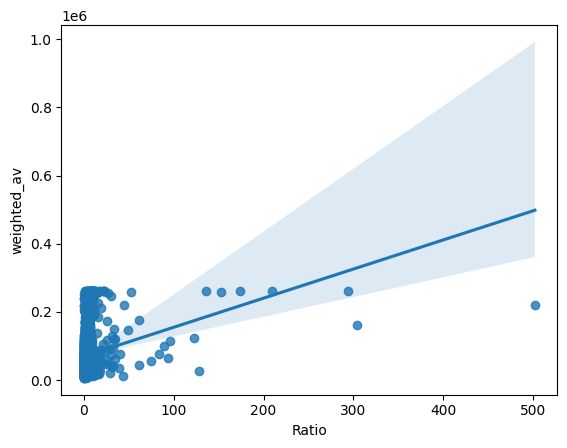

In [10]:
p = sns.regplot(intersection, x='Ratio', y='weighted_av')

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print(slope, intercept)

In [14]:
corr_240 = intersection['Ratio'].corr(intersection['weighted_av'])
corr_240

0.20953867385827607

In [11]:
intersection[intersection['Ratio']>400]

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
90,CCAATTTCGAGGGA,502,AACTTCTTTCAACAACCAAATAATTCATTCTCTGTTAATAATACTG...,1,502.0,AACTTCTTTCAACAACCAAATAATTCATTCTCTGTTAATAATACTG...,GATTACCCTGG,AACTTCTTTCAACAACCAAATAATTCATTCTCTGTTAATAATACTG...,0.0,220087.082121,0.0,18513.0,220087.082121


In [11]:
# read in 3_10 csv

ciber_10 = pd.read_csv('/global/scratch/users/empchase/Ciber2_i/paired/ExperimentData_20240423/data_3_10_1.csv',usecols=['index_x', 'BCs', 'index_y', 'Tile-AD','Ratio'])


#just get tiles, maybe collapse for tile activity
ciber_10[['Tile', 'AD']] = ciber_10['index_y'].str.split('-', expand=True)
ciber_10.head()

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD
0,GCTTCTCCGCACAT,5391,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,221,24.393665,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,TAACATCTATC
1,GTCCAGTTTAGTGA,3585,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,291,12.319588,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,AGTGCAGAGAC
2,TGGGCCGGAATTGC,3214,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,342,9.397661,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,ATATACCGCAC
3,TAGGAATTAGATCT,3035,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,123,24.674797,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,TTACTGCTGTG
4,TCAGCATCCAACAC,2727,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,5,545.400000,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,GGGCGCAGTTC


In [12]:
intersection_10 = pd.merge(ciber_10, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection_10

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
0,GCTTCTCCGCACAT,5391,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,221,24.393665,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,TAACATCTATC,ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAATG...,252390.696777,258607.941783,2722.0,11678.0,257432.709775
1,GTCCAGTTTAGTGA,3585,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,291,12.319588,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,AGTGCAGAGAC,ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATTTG...,252586.126418,222624.487250,17475.0,30141.0,233620.363520
2,TGGGCCGGAATTGC,3214,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,342,9.397661,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,ATATACCGCAC,GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTTTC...,252783.250469,205088.018248,12034.0,18.0,252712.016303
3,TAGGAATTAGATCT,3035,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,123,24.674797,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,TTACTGCTGTG,GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTCTT...,261683.287481,255592.816124,117627.0,45051.0,259996.631479
4,TCAGCATCCAACAC,2727,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,5,545.400000,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,GGGCGCAGTTC,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,260187.538772,261318.609309,44724.0,155247.0,261065.642635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,TCATCGGTGTTATG,1,TTTAATTCTCCAGCTCAAAATTCTAATTCTCAACAACAACAACAAT...,9,0.111111,TTTAATTCTCCAGCTCAAAATTCTAATTCTCAACAACAACAACAAT...,TGAAAGCCGCG,TTTAATTCTCCAGCTCAAAATTCTAATTCTCAACAACAACAACAAT...,0.000000,24962.137465,0.0,68.0,24962.137465
2594,TTCTCACTAAGGCG,1,AGAAGATCTTCTTCTCCAGGTTCTTCTCCAAGATCTGGTGCTAGGA...,2,0.500000,AGAAGATCTTCTTCTCCAGGTTCTTCTCCAAGATCTGGTGCTAGGA...,CAAGCCCGTGG,AGAAGATCTTCTTCTCCAGGTTCTTCTCCAAGATCTGGTGCTAGGA...,36862.309018,21838.977104,21256.0,9769.0,32131.835869
2595,ATACAGACTCTTGT,1,CAATCTATGACTGATAAGAATGAAGATTATTGGTATAGAATTGTTC...,1,1.000000,CAATCTATGACTGATAAGAATGAAGATTATTGGTATAGAATTGTTC...,GAATTTAGCTA,CAATCTATGACTGATAAGAATGAAGATTATTGGTATAGAATTGTTC...,67102.837707,39747.914918,32764.0,5704.0,63046.674673
2596,CCGTTATCCACATG,1,AAAGATAGATTTGGTTGTACTCCATATACTAGGAAGAAGAGAGCTT...,6,0.166667,AAAGATAGATTTGGTTGTACTCCATATACTAGGAAGAAGAGAGCTT...,GCTGCTTGTGC,AAAGATAGATTTGGTTGTACTCCATATACTAGGAAGAAGAGAGCTT...,43680.321552,38366.184543,45857.0,11548.0,42611.291778


829.9343062912639 69344.08638987143


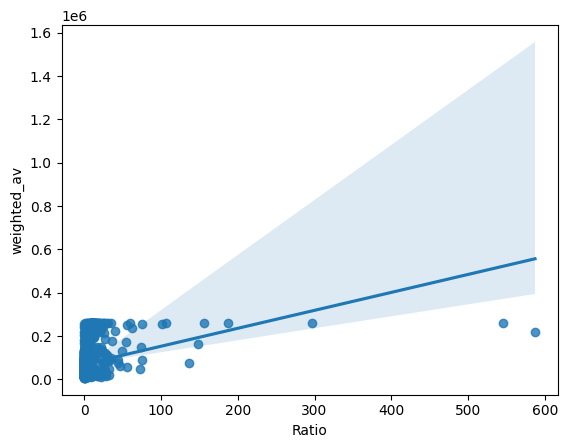

In [13]:
p = sns.regplot(intersection_10, x='Ratio', y='weighted_av')

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print(slope, intercept)

In [15]:
corr_10 = intersection_10['Ratio'].corr(intersection['weighted_av'])
corr_10

0.11572476493786929

In [20]:
facs_lowest = facs.nsmallest(100, 'weighted_av')
facs_lowest

,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
1843,ATGACTTTGTTTGGTTGGGTTCAATTGGCTAAAGATTCTATGGCTC...,6138.0,0.0,309.0,0.0,6138.0
5165,TCTGAAAATTCTGAAGAATTAAATTCTCATTTGCCACCAGTTATTG...,6138.0,0.0,88.0,0.0,6138.0
5272,TCTTCTTCTGCTGCTTTGTCTATTCAAACTCCAAATAGACATGGTA...,6138.0,0.0,486.0,0.0,6138.0
5743,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,6138.0,0.0,279.0,0.0,6138.0
6004,GACTTTGTCTTGTTTGATTCTCCACAACCACAAAGAACTACTGTTA...,6138.0,0.0,49.0,0.0,6138.0
...,...,...,...,...,...,...
16066,GCTGCTCAATTCTCTAGAGTTAGAAATCCAGCTTCTAGAGGTACTG...,0.0,9013.0,0.0,131.0,9013.0
16067,ACTACTACTCCAGTTGACTTTGAAGATTCTTTGTTTGAATCTCATG...,0.0,9013.0,0.0,329.0,9013.0
16147,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,0.0,9013.0,0.0,844.0,9013.0
16214,GCTGTTAAGAGAGCTAGAAATACTGCTGCTGCTAGGAAATCTAGAA...,0.0,9013.0,0.0,2882.0,9013.0


In [22]:
low_int_240 = pd.merge(ciber, facs_lowest,
                      left_on='Tile', right_on='ArrayDNA',
                      how='right').dropna()
low_int_240

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
3,TCCTATCAGGACTT,6.0,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,11.0,0.545455,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,ATTTCTAAACC,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,6138.000000,0.000000,279.0,0.0,6138.000000
32,TGCCCTCATCGAGC,27.0,ATGACTTTGGCTACATTTGCTCAAGAGAAATCTGGTAAACCAAGAC...,80.0,0.337500,ATGACTTTGGCTACATTTGCTCAAGAGAAATCTGGTAAACCAAGAC...,CCTCACACTAC,ATGACTTTGGCTACATTTGCTCAAGAGAAATCTGGTAAACCAAGAC...,6150.501319,0.000000,1740.0,0.0,6150.501319
41,TCTAATTCCTATCT,10.0,TCTCCATCTAATACTATTTCATTCTCTGATCCAGTCTTGTTTCCAT...,5.0,2.000000,TCTCCATCTAATACTATTTCATTCTCTGATCCAGTCTTGTTTCCAT...,ACTGTCATAAA,TCTCCATCTAATACTATTTCATTCTCTGATCCAGTCTTGTTTCCAT...,6192.889903,0.000000,199.0,0.0,6192.889903
49,AAATTAATAGCACT,12.0,CCATCTGATGTTATTGCTGTTAAGAGAGCTAGAAATACTTTGGCTG...,34.0,0.352941,CCATCTGATGTTATTGCTGTTAAGAGAGCTAGAAATACTTTGGCTG...,CGTGAATCACA,CCATCTGATGTTATTGCTGTTAAGAGAGCTAGAAATACTTTGGCTG...,6476.141806,0.000000,262.0,0.0,6476.141806
86,TGCAGAAATTGAAT,20.0,AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...,68.0,0.294118,AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...,TGCTGGGCGAT,AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...,7969.093274,11192.221838,6260.0,2997.0,9012.597250
97,TAGTTGTAGCTCAG,430.0,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,122.0,3.524590,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,AGCTCTCTTTA,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,0.000000,9013.000000,0.0,844.0,9013.000000


In [23]:
low_int_10 = pd.merge(ciber_10, facs_lowest,
                      left_on='Tile', right_on='ArrayDNA',
                      how='right').dropna()
low_int_10

,index_x,BCs,index_y,Tile-AD,Ratio,Tile,AD,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
3,TCCTATCAGGACTT,6.0,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,14.0,0.428571,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,ATTTCTAAACC,GTCTTGGCTTCTAATGATTTGTTGTTGCCACATCCAACTTCTCCAC...,6138.000000,0.000000,279.0,0.0,6138.000000
32,TGCCCTCATCGAGC,37.0,ATGACTTTGGCTACATTTGCTCAAGAGAAATCTGGTAAACCAAGAC...,67.0,0.552239,ATGACTTTGGCTACATTTGCTCAAGAGAAATCTGGTAAACCAAGAC...,CCTCACACTAC,ATGACTTTGGCTACATTTGCTCAAGAGAAATCTGGTAAACCAAGAC...,6150.501319,0.000000,1740.0,0.0,6150.501319
41,TCTAATTCCTATCT,7.0,TCTCCATCTAATACTATTTCATTCTCTGATCCAGTCTTGTTTCCAT...,7.0,1.000000,TCTCCATCTAATACTATTTCATTCTCTGATCCAGTCTTGTTTCCAT...,ACTGTCATAAA,TCTCCATCTAATACTATTTCATTCTCTGATCCAGTCTTGTTTCCAT...,6192.889903,0.000000,199.0,0.0,6192.889903
49,AAATTAATAGCACT,15.0,CCATCTGATGTTATTGCTGTTAAGAGAGCTAGAAATACTTTGGCTG...,27.0,0.555556,CCATCTGATGTTATTGCTGTTAAGAGAGCTAGAAATACTTTGGCTG...,CGTGAATCACA,CCATCTGATGTTATTGCTGTTAAGAGAGCTAGAAATACTTTGGCTG...,6476.141806,0.000000,262.0,0.0,6476.141806
52,AGACTGTTTACCGA,1.0,GGTAAATTGAAAGTTTGGATTAGAAGAGTTTGGACTTTGGAAATGT...,2.0,0.500000,GGTAAATTGAAAGTTTGGATTAGAAGAGTTTGGACTTTGGAAATGT...,GCAAAAGCCCC,GGTAAATTGAAAGTTTGGATTAGAAGAGTTTGGACTTTGGAAATGT...,6138.000000,9067.765325,410.0,113.0,6771.008569
86,TGCAGAAATTGAAT,8.0,AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...,61.0,0.131148,AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...,TGCTGGGCGAT,AGAGCTAGGAAATTGGAAAGACAAGAAGAAATGGAAAGAAGAATTG...,7969.093274,11192.221838,6260.0,2997.0,9012.597250
97,TAGTTGTAGCTCAG,387.0,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,82.0,4.719512,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,AGCTCTCTTTA,ACTACTACTCCAATCTTGACTTCTGATTCATTTGTTGATTCTTTGG...,0.000000,9013.000000,0.0,844.0,9013.000000
